In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import numpy as np
#from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
import scipy.misc
import matplotlib
#import xgboost as XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ConvLSTM2D, Flatten, Dropout, MaxPooling2D,MaxPooling3D, TimeDistributed, Conv2D, LSTM, SimpleRNN, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

import io
import matplotlib.pyplot as plt
import imageio
from sklearn.metrics import r2_score
# from IPython.display import Image, display
# from ipywidgets import widgets, Layout, HBox
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import UpSampling3D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from tensorflow import keras
import tensorflow_addons as tfa

from keras.layers import Conv3D, MaxPool3D, Flatten, Dense, LSTM
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py
import pickle
import tensorflow as tf


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to enco

In [3]:
def load_data():
    data = []
    path = rf"{os.getcwd()}\src\yearly_data"
    for file in os.listdir(path):
        df = pd.read_csv(f'{path}/{file}')
        df.drop(columns=[df.columns[0]], axis=1, inplace=True)
        df.fillna(0.0, inplace=True)
        data.append(df.to_numpy())
    return np.array(data)

data = load_data()


In [4]:
def reshape_data(data):
    data_shifted = data[2:]
    data = data[:-2]
    data = data.reshape((38, 277, 228, 1))
    return data, data_shifted

data, data_shifted = reshape_data(data)

In [5]:
def train_test_split():
    train_dataset = data[:32]
    train_labels = data_shifted[:32]
    test_dataset = data[-6:]
    test_labels = data_shifted[-6:]
    print("Training Dataset Shapes: " + str(train_dataset.shape) + ", " + str(train_labels.shape))
    print("Validation Dataset Shapes: " + str(test_dataset.shape) + ", " + str(test_labels.shape))
    np.save("train_dataset.npy", train_dataset)
    np.save("train_labels.npy", train_labels)
    np.save("test_dataset.npy", test_dataset)
    np.save("test_labels.npy", test_labels)
    return train_dataset, train_labels, test_dataset, test_labels

train_dataset, train_labels, test_dataset, test_labels = train_test_split()

Training Dataset Shapes: (32, 277, 228, 1), (32, 277, 228)
Validation Dataset Shapes: (6, 277, 228, 1), (6, 277, 228)


In [6]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
n_steps = 2
traindata = np.reshape(train_dataset, (32,63156))
trainlabel =  np.reshape(train_labels,(32,63156) )
X, y = split_sequence(traindata, n_steps)
X.shape, y.shape

((30, 2, 63156), (30, 63156))

In [7]:
n_steps = 2
testdata = np.reshape(test_dataset, (6,63156))
testlabel =  np.reshape(test_labels,(6,63156) )
XTest, YTest = split_sequence(testdata, n_steps)
print(XTest.shape, YTest.shape)
n_features = XTest.shape[2]
XTest = XTest.reshape((XTest.shape[0], XTest.shape[1], n_features))

(4, 2, 63156) (4, 63156)


In [8]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

n_features = X.shape[2]
X = X.reshape((X.shape[0], X.shape[1], n_features))
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2, padding ='same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(63156))
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

start_time = time.time()
history= model.fit(X, y, epochs=50, validation_data=(XTest, YTest), verbose=2)
end_time = time.time()
training_time = end_time - start_time

np.save(rf"{os.getcwd()}\models\1dcnn\1dcnn.npy", history.history)
model.save(rf"{os.getcwd()}\models\1dcnn\1dcnn.h5")

Epoch 1/50
1/1 - 1s - loss: 45.8398 - mse: 2709.0168 - val_loss: 59.6011 - val_mse: 5193.8672 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 48.2956 - mse: 3592.2996 - val_loss: 45.7774 - val_mse: 3230.5269 - 470ms/epoch - 470ms/step
Epoch 3/50
1/1 - 0s - loss: 38.5720 - mse: 2388.1992 - val_loss: 36.2910 - val_mse: 2019.4148 - 475ms/epoch - 475ms/step
Epoch 4/50
1/1 - 0s - loss: 29.7168 - mse: 1409.8549 - val_loss: 33.1030 - val_mse: 1610.5037 - 486ms/epoch - 486ms/step
Epoch 5/50
1/1 - 1s - loss: 25.7980 - mse: 1038.8434 - val_loss: 26.3386 - val_mse: 1072.3230 - 522ms/epoch - 522ms/step
Epoch 6/50
1/1 - 0s - loss: 22.9845 - mse: 840.6048 - val_loss: 23.7573 - val_mse: 851.2572 - 464ms/epoch - 464ms/step
Epoch 7/50
1/1 - 0s - loss: 19.8467 - mse: 621.6495 - val_loss: 24.1660 - val_mse: 879.5983 - 468ms/epoch - 468ms/step
Epoch 8/50
1/1 - 0s - loss: 20.0416 - mse: 632.8969 - val_loss: 23.6504 - val_mse: 851.5693 - 490ms/epoch - 490ms/step
Epoch 9/50
1/1 - 0s - loss: 19.9356 - mse: 6

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from tensorflow import keras
import tensorflow_addons as tfa

model_1dcnn = load_model(rf"{os.getcwd()}\models\1dcnn\1dcnn.h5")
history_1dcnn = np.load(rf"{os.getcwd()}\models\1dcnn\1dcnn.npy",allow_pickle=True).item()
history_1dcnn.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

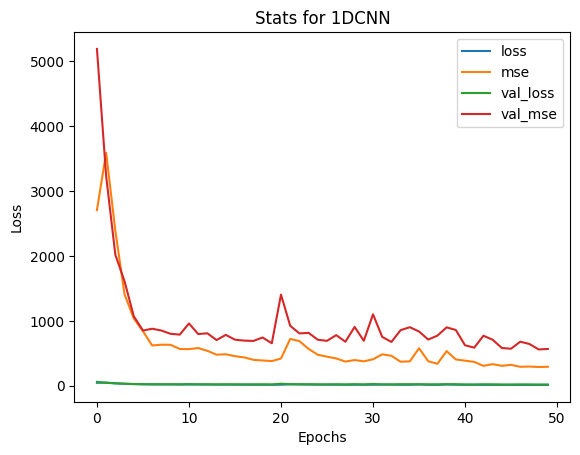

In [10]:
plt.plot(history_1dcnn['loss'])
plt.plot(history_1dcnn['mse'])
plt.plot(history_1dcnn['val_loss'])
plt.plot(history_1dcnn['val_mse'])

plt.title('Stats for 1DCNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','mse','val_loss','val_mse'])
plt.show()

In [11]:
framed = XTest[0]
(np.expand_dims(framed, axis=0)).shape

(1, 2, 63156)

1/1 [==============================] - 0s 86ms/step
(1, 63156)
R2 Score for 1DCNN :  0.09177934847128033


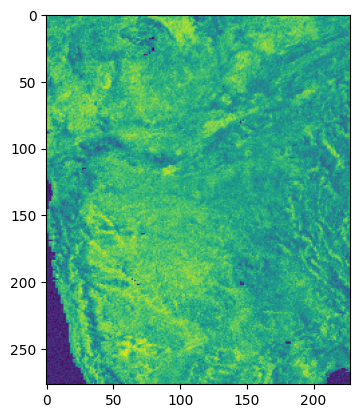

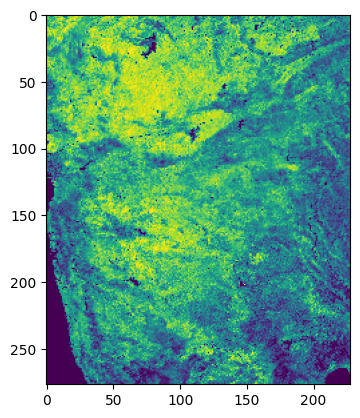

In [12]:
model = model_1dcnn
from sklearn.metrics import r2_score
framed = XTest[0]
pred = model.predict(np.expand_dims(framed, axis=0))
print(pred.shape)
y_real = YTest[0].reshape(277,228)
pred = pred.reshape(277,228)
r2 = r2_score(y_real,pred)
print("R2 Score for 1DCNN : ", r2)
plt.imshow(pred.reshape(277,228))
plt.figure()
plt.imshow(y_real.reshape(277,228))

In [13]:
model = model_1dcnn
from sklearn.metrics import r2_score

test_r2_scores = []
test_mae = []
test_mse = []
for i in range(len(XTest)):
    framed = XTest[i]
    pred = model.predict(np.expand_dims(framed, axis=0))
    y_real = YTest[i].reshape(277,228)
    pred = pred.reshape(277,228)
    r2 = r2_score(y_real,pred)
    test_r2_scores.append(r2)
    error = (pred - y_real).reshape(277*228)
    mae = sum(abs(error))/len(error)
    test_mae.append(mae)
    mse = np.mean((error) ** 2)
    test_mse.append(mse)


print("Training Time : 1DCNN : ", training_time)
print("R2 Score for 1DCNN : ", sum(test_r2_scores)/len(test_r2_scores))
print("MSE for 1DCNN : ", sum(test_mse)/len(test_mse))
print("MAE Score for 1DCNN : ", sum(test_mae)/len(test_mae))

1/1 [==============================] - 0s 31ms/step
Training Time : 1DCNN :  22.059972524642944
R2 Score for 1DCNN :  -0.20447006526755573
MSE for 1DCNN :  567.5043700118532
MAE Score for 1DCNN :  19.11631515379021


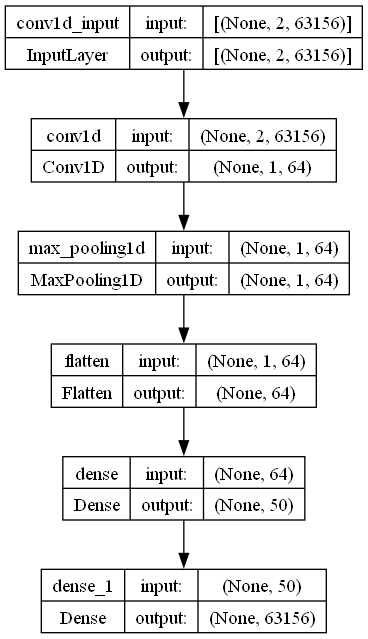

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)